In [272]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

Load image (jpg)

In [273]:
img_jpg = cv2.imread('lena.jpg', 0)

 Load Image (png) 

In [274]:
img_png = cv2.imread('lena.png', 0)

Load Image (tiff)

In [275]:
img_tiff = cv2.imread('lena.tiff', 0)

### Convert the image into Frequency Domain 

#### JPG 

In [276]:
dft_jpg = cv2.dft(np.float32(img_jpg), flags = cv2.DFT_COMPLEX_OUTPUT)

#### PNG 

In [277]:
dft_png = cv2.dft(np.float32(img_png), flags = cv2.DFT_COMPLEX_OUTPUT)

#### TIFF 

In [278]:
dft_tiff = cv2.dft(np.float32(img_tiff), flags = cv2.DFT_COMPLEX_OUTPUT)

### Shifting the Frequency into centre

#### JPG 

In [279]:
dftShift_jpg = np.fft.fftshift(dft_jpg)

#### PNG 

In [280]:
dftShift_png = np.fft.fftshift(dft_png)

#### TIFF 

In [281]:
dftShift_tiff = np.fft.fftshift(dft_tiff)

### Magnitude of the function is 20*log(abs(f)) 

#### JPG 

In [282]:
magnitudeSpectrum_jpg = 20 * np.log(cv2.magnitude(dftShift_jpg[:, :, 0], dftShift_jpg[:, :, 1]))

#### PNG 

In [283]:
magnitudeSpectrum_png = 20 * np.log(cv2.magnitude(dftShift_png[:, :, 0], dftShift_png[:, :, 1]))

#### TIFF 

In [284]:
magnitudeSpectrum_tiff = 20 * np.log(cv2.magnitude(dftShift_tiff[:, :, 0], dftShift_tiff[:, :, 1]))

### We are making it to Low pass Filter for smoothing the given images. That's why we are making a circular mask with the center is 1 and the remaining ones are 0. Because We only want to pass the Low frequency which stores in the center.   

### Filter 1 

JPG

In [285]:
rows , cols = img_jpg.shape
centerRow, centerColumn = int (rows / 2), int(cols / 2)
mask1 = np.zeros((rows, cols, 2), np.uint8)
circleRadius1 = 2
circleCenter = [centerRow, centerColumn]
x, y = np.ogrid[: rows, : cols]
maskArea1 = (x - circleCenter[0]) ** 2 + (y - circleCenter[1]) ** 2 <= circleRadius1 ** 2
mask1[maskArea1] = 1                                         

PNG

In [286]:
rows , cols = img_png.shape
centerRow, centerColumn = int (rows / 2), int(cols / 2)
mask1 = np.zeros((rows, cols, 2), np.uint8)
circleRadius1 = 2
circleCenter = [centerRow, centerColumn]
x, y = np.ogrid[: rows, : cols]
maskArea1 = (x - circleCenter[0]) ** 2 + (y - circleCenter[1]) ** 2 <= circleRadius1 ** 2
mask1[maskArea1] = 1   

TIFF

In [287]:
rows , cols = img_tiff.shape
centerRow, centerColumn = int (rows / 2), int(cols / 2)
mask1 = np.zeros((rows, cols, 2), np.uint8)
circleRadius1 = 2
circleCenter = [centerRow, centerColumn]
x, y = np.ogrid[: rows, : cols]
maskArea1 = (x - circleCenter[0]) ** 2 + (y - circleCenter[1]) ** 2 <= circleRadius1 ** 2
mask1[maskArea1] = 1   

### Filter 2 

JPG

In [288]:
rows , cols = img_jpg.shape
centerRow, centerColumn = int (rows / 2), int(cols / 2)
mask2 = np.zeros((rows, cols, 2), np.uint8)
circleRadius2 = 3
circleCenter = [centerRow, centerColumn]
x, y = np.ogrid[: rows, : cols]
maskArea2 = (x - circleCenter[0]) ** 2 + (y - circleCenter[1]) ** 2 <= circleRadius2 ** 2
mask2[maskArea2] = 1    

PNG

In [289]:
rows , cols = img_png.shape
centerRow, centerColumn = int (rows / 2), int(cols / 2)
mask2 = np.zeros((rows, cols, 2), np.uint8)
circleRadius2 = 3
circleCenter = [centerRow, centerColumn]
x, y = np.ogrid[: rows, : cols]
maskArea2 = (x - circleCenter[0]) ** 2 + (y - circleCenter[1]) ** 2 <= circleRadius2 ** 2
mask2[maskArea2] = 1   

TIFF

In [290]:
rows , cols = img_tiff.shape
centerRow, centerColumn = int (rows / 2), int(cols / 2)
mask2 = np.zeros((rows, cols, 2), np.uint8)
circleRadius2 = 3
circleCenter = [centerRow, centerColumn]
x, y = np.ogrid[: rows, : cols]
maskArea2 = (x - circleCenter[0]) ** 2 + (y - circleCenter[1]) ** 2 <= circleRadius2 ** 2
mask2[maskArea2] = 1   

### Filter 3 

JPG

In [291]:
rows , cols = img_jpg.shape
centerRow, centerColumn = int (rows / 2), int(cols / 2)
mask3 = np.zeros((rows, cols, 2), np.uint8)
circleRadius3 = 5
circleCenter = [centerRow, centerColumn]
x, y = np.ogrid[: rows, : cols]
maskArea3 = (x - circleCenter[0]) ** 2 + (y - circleCenter[1]) ** 2 <= circleRadius3 ** 2
mask3[maskArea3] = 1   

PNG

In [292]:
rows , cols = img_png.shape
centerRow, centerColumn = int (rows / 2), int(cols / 2)
mask3 = np.zeros((rows, cols, 2), np.uint8)
circleRadius3 = 5
circleCenter = [centerRow, centerColumn]
x, y = np.ogrid[: rows, : cols]
maskArea3 = (x - circleCenter[0]) ** 2 + (y - circleCenter[1]) ** 2 <= circleRadius3 ** 2
mask3[maskArea3] = 1 

TIFF

In [293]:
rows , cols = img_tiff.shape
centerRow, centerColumn = int (rows / 2), int(cols / 2)
mask3 = np.zeros((rows, cols, 2), np.uint8)
circleRadius3 = 5
circleCenter = [centerRow, centerColumn]
x, y = np.ogrid[: rows, : cols]
maskArea3 = (x - circleCenter[0]) ** 2 + (y - circleCenter[1]) ** 2 <= circleRadius3 ** 2
mask3[maskArea3] = 1 

### Multiplying this mask value to fourier transformed image values 

JPG

In [294]:
fshift_jpg1 = dftShift_jpg * mask1

fshift_jpg2 = dftShift_jpg * mask2

fshift_jpg3 = dftShift_jpg * mask3

PNG

In [295]:
fshift_png1 = dftShift_png * mask1

fshift_png2 = dftShift_png * mask2

fshift_png3 = dftShift_png * mask3

TIFF

In [296]:
fshift_tiff1 = dftShift_tiff * mask1

fshift_tiff2 = dftShift_tiff * mask2

fshift_tiff3 = dftShift_tiff * mask3

#### Magnitude Spectrum for Plotting Purpose  

JPG

In [297]:
fshift_mask_mag_jpg1 = 20 * np.log(cv2.magnitude(fshift_jpg1[:, :, 0] + 1, fshift_jpg1[:, :, 1] + 1))

fshift_mask_mag_jpg2 = 20 * np.log(cv2.magnitude(fshift_jpg2[:, :, 0] + 1, fshift_jpg2[:, :, 1] + 1))

fshift_mask_mag_jpg3 = 20 * np.log(cv2.magnitude(fshift_jpg3[:, :, 0] + 1, fshift_jpg3[:, :, 1] + 1))

PNG

In [298]:
fshift_mask_mag_png1 = 20 * np.log(cv2.magnitude(fshift_png1[:, :, 0] + 1, fshift_png1[:, :, 1] + 1))

fshift_mask_mag_png2 = 20 * np.log(cv2.magnitude(fshift_png2[:, :, 0] + 1, fshift_png2[:, :, 1] + 1))

fshift_mask_mag_png3 = 20 * np.log(cv2.magnitude(fshift_png3[:, :, 0] + 1, fshift_png3[:, :, 1] + 1))

TIFF

In [299]:
fshift_mask_mag_tiff1 = 20 * np.log(cv2.magnitude(fshift_tiff1[:, :, 0] + 1, fshift_tiff1[:, :, 1] + 1))

fshift_mask_mag_tiff2 = 20 * np.log(cv2.magnitude(fshift_tiff2[:, :, 0] + 1, fshift_tiff2[:, :, 1] + 1))

fshift_mask_mag_tiff3 = 20 * np.log(cv2.magnitude(fshift_tiff3[:, :, 0] + 1, fshift_tiff3[:, :, 1] + 1))

#### Inverse shift to shift origin back to the top left 

JPG

In [300]:
f_ishift_jpg1 = np.fft.ifftshift(fshift_jpg1)

f_ishift_jpg2 = np.fft.ifftshift(fshift_jpg2)

f_ishift_jpg3 = np.fft.ifftshift(fshift_jpg3)

PNG

In [301]:
f_ishift_png1 = np.fft.ifftshift(fshift_png1)

f_ishift_png2 = np.fft.ifftshift(fshift_png2)

f_ishift_png3 = np.fft.ifftshift(fshift_png3)

TIFF

In [302]:
f_ishift_tiff1 = np.fft.ifftshift(fshift_tiff1)

f_ishift_tiff2 = np.fft.ifftshift(fshift_tiff2)

f_ishift_tiff3 = np.fft.ifftshift(fshift_tiff3)

#### Inverse DFT to convert back to image domain from the Frequency domain (It will be complex numbers) 

JPG

In [303]:
img_back_jpg1 = cv2.idft(f_ishift_jpg1)

img_back_jpg2 = cv2.idft(f_ishift_jpg2)

img_back_jpg3 = cv2.idft(f_ishift_jpg3)

PNG

In [304]:
img_back_png1 = cv2.idft(f_ishift_png1)

img_back_png2 = cv2.idft(f_ishift_png2)

img_back_png3 = cv2.idft(f_ishift_png3)

TIFF

In [305]:
img_back_tiff1 = cv2.idft(f_ishift_tiff1)

img_back_tiff2 = cv2.idft(f_ishift_tiff2)

img_back_tiff3 = cv2.idft(f_ishift_tiff3)

#### Magnitude Spectrum of the image domain 

JPG

In [306]:
img_back_jpg1 = cv2.magnitude(img_back_jpg1[:, :, 0], img_back_jpg1[:, :, 1])

img_back_jpg2 = cv2.magnitude(img_back_jpg2[:, :, 0], img_back_jpg2[:, :, 1])

img_back_jpg3 = cv2.magnitude(img_back_jpg3[:, :, 0], img_back_jpg3[:, :, 1])

PNG

In [307]:
img_back_png1 = cv2.magnitude(img_back_png1[:, :, 0], img_back_png1[:, :, 1])

img_back_png2 = cv2.magnitude(img_back_png2[:, :, 0], img_back_png2[:, :, 1])

img_back_png3 = cv2.magnitude(img_back_png3[:, :, 0], img_back_png3[:, :, 1])

TIFF

In [308]:
img_back_tiff1 = cv2.magnitude(img_back_tiff1[:, :, 0], img_back_tiff1[:, :, 1])

img_back_tiff2 = cv2.magnitude(img_back_tiff2[:, :, 0], img_back_tiff2[:, :, 1])

img_back_tiff3 = cv2.magnitude(img_back_tiff3[:, :, 0], img_back_tiff3[:, :, 1])

#### List for JPG images 

In [309]:
imagesFFT_jpg1 = [img_jpg, magnitudeSpectrum_jpg, fshift_mask_mag_jpg1, img_back_jpg1]

imagesFFT_jpg2 = [img_jpg, magnitudeSpectrum_jpg, fshift_mask_mag_jpg2, img_back_jpg2]

imagesFFT_jpg3 = [img_jpg, magnitudeSpectrum_jpg, fshift_mask_mag_jpg3, img_back_jpg3]

#### List for PNG images 

In [310]:
imagesFFT_png1 = [img_png, magnitudeSpectrum_png, fshift_mask_mag_png1, img_back_png1]

imagesFFT_png2 = [img_png, magnitudeSpectrum_png, fshift_mask_mag_png2, img_back_png2]

imagesFFT_png3 = [img_png, magnitudeSpectrum_png, fshift_mask_mag_png3, img_back_png3]

#### List for TIFF image 

In [311]:
imagesFFT_tiff1 = [img_tiff, magnitudeSpectrum_tiff, fshift_mask_mag_tiff1, img_back_tiff1]

imagesFFT_tiff2 = [img_tiff, magnitudeSpectrum_tiff, fshift_mask_mag_tiff2, img_back_tiff2]

imagesFFT_tiff3 = [img_tiff, magnitudeSpectrum_tiff, fshift_mask_mag_tiff3, img_back_tiff3]

# JPG Filter Image Output (Frequency Domain - Smoothing) 

### Figures  For Filter 1  

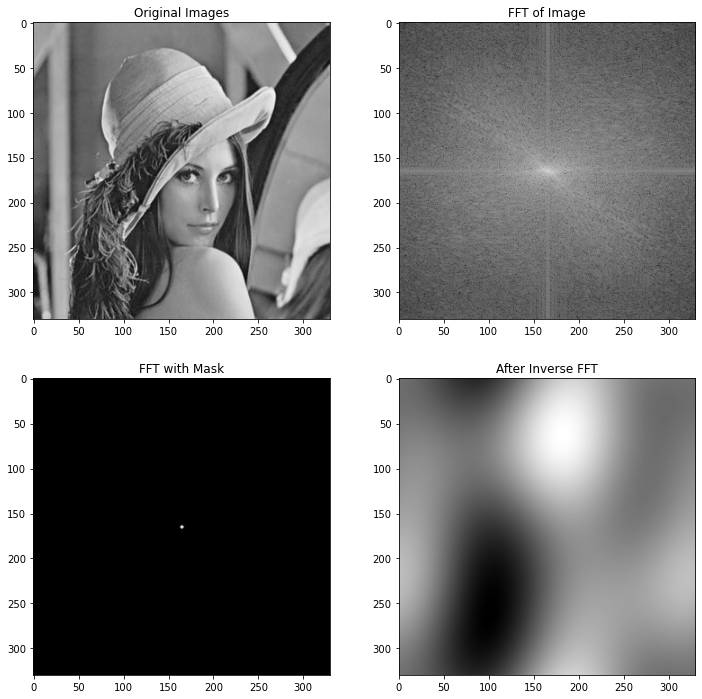

In [312]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imagesFFT_jpg1[0], cmap = 'gray')
ax1.title.set_text('Original Images')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imagesFFT_jpg1[1], cmap = 'gray')
ax2.title.set_text('FFT of Image')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(imagesFFT_jpg1[2], cmap='gray')
ax3.title.set_text('FFT with Mask')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(imagesFFT_jpg1[3], cmap = 'gray')
ax4.title.set_text('After Inverse FFT')
plt.show()

#### Figures for Filter 2 

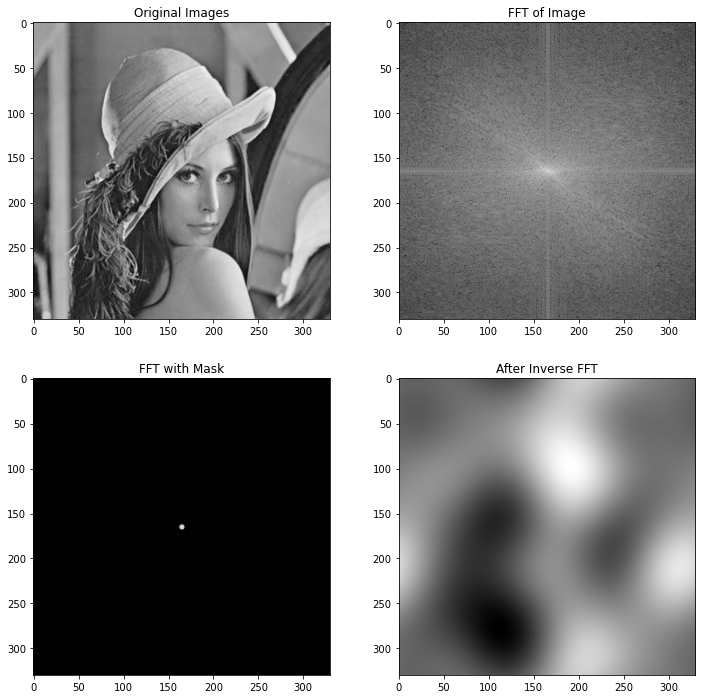

In [313]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imagesFFT_jpg2[0], cmap = 'gray')
ax1.title.set_text('Original Images')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imagesFFT_jpg2[1], cmap = 'gray')
ax2.title.set_text('FFT of Image')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(imagesFFT_jpg2[2], cmap='gray')
ax3.title.set_text('FFT with Mask')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(imagesFFT_jpg2[3], cmap = 'gray')
ax4.title.set_text('After Inverse FFT')
plt.show()

#### Plot figures for FD Filter 3 (Smoothing) 

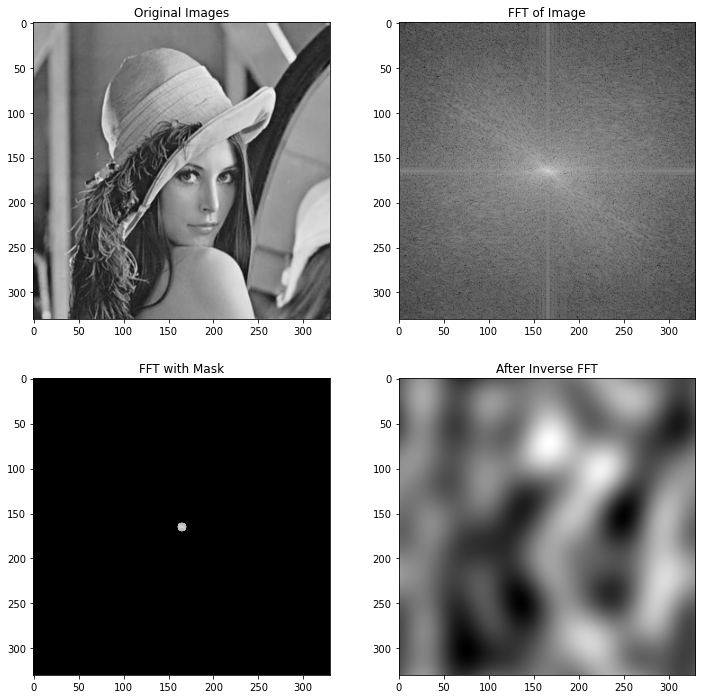

In [314]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imagesFFT_jpg3[0], cmap = 'gray')
ax1.title.set_text('Original Images')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imagesFFT_jpg3[1], cmap = 'gray')
ax2.title.set_text('FFT of Image')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(imagesFFT_jpg3[2], cmap='gray')
ax3.title.set_text('FFT with Mask')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(imagesFFT_jpg3[3], cmap = 'gray')
ax4.title.set_text('After Inverse FFT')
plt.show()

## Calculating Histogram For JPG  

In [315]:
histogram_title_jpg = ['Original Image', 'Smoothing Filter 1', 'Smoothing Filter 2', 'smoothing Filter 3']
histogram_jpg = [img_jpg, img_back_jpg1, img_back_jpg2, img_back_jpg3]

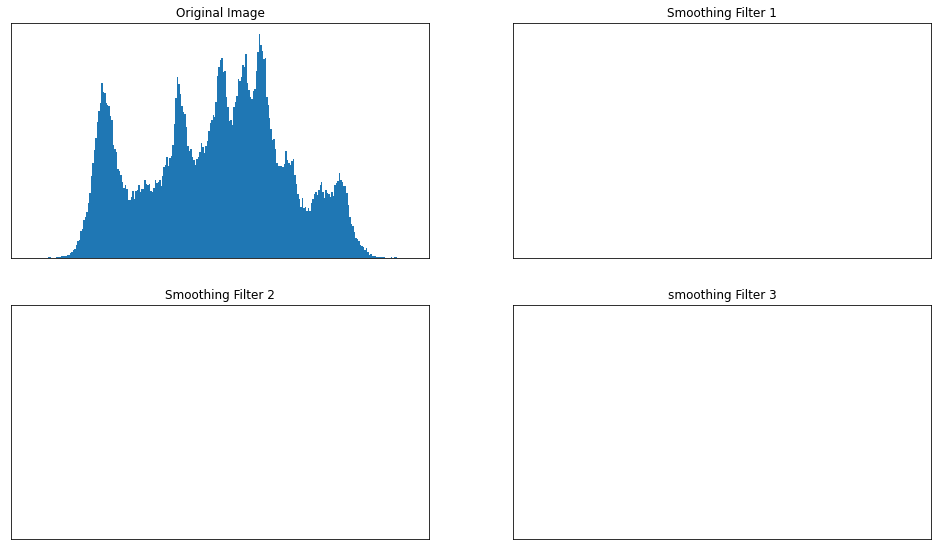

In [316]:

for i in range(4):
    plt.subplot(2, 2, i+1), plt.hist(histogram_jpg[i].ravel(), 256, [0, 256])
    plt.title(histogram_title_jpg[i])
    plt.xticks([]), plt.yticks([])

fig = plt.gcf()
fig.set_size_inches(16.5, 9.5)


# PNG Filter Image Output (Frequency Domain - Smoothing)

#### Figure for Filter 1 

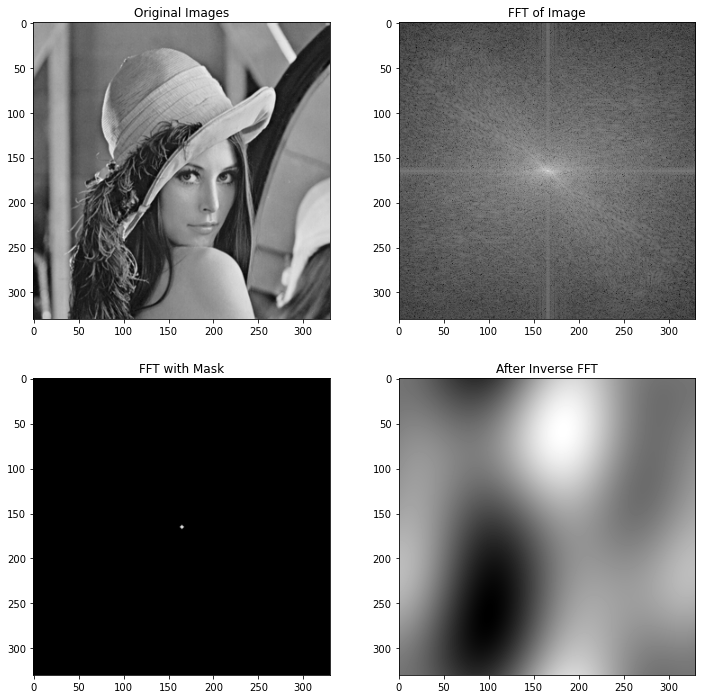

In [317]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imagesFFT_png1[0], cmap = 'gray')
ax1.title.set_text('Original Images')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imagesFFT_png1[1], cmap = 'gray')
ax2.title.set_text('FFT of Image')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(imagesFFT_png1[2], cmap='gray')
ax3.title.set_text('FFT with Mask')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(imagesFFT_png1[3], cmap = 'gray')
ax4.title.set_text('After Inverse FFT')
plt.show()

#### Figure for Filter 2 

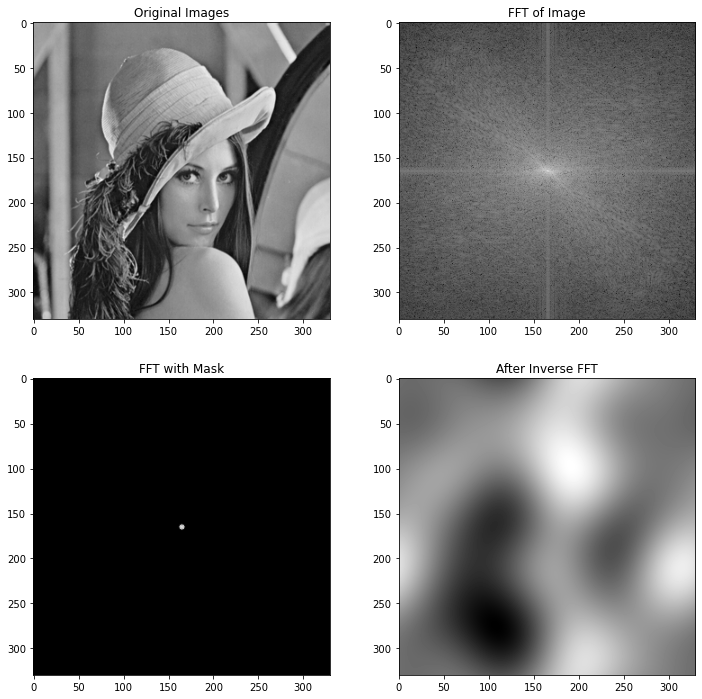

In [318]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imagesFFT_png2[0], cmap = 'gray')
ax1.title.set_text('Original Images')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imagesFFT_png2[1], cmap = 'gray')
ax2.title.set_text('FFT of Image')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(imagesFFT_png2[2], cmap='gray')
ax3.title.set_text('FFT with Mask')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(imagesFFT_png2[3], cmap = 'gray')
ax4.title.set_text('After Inverse FFT')
plt.show()

#### Figure for Filter 3 

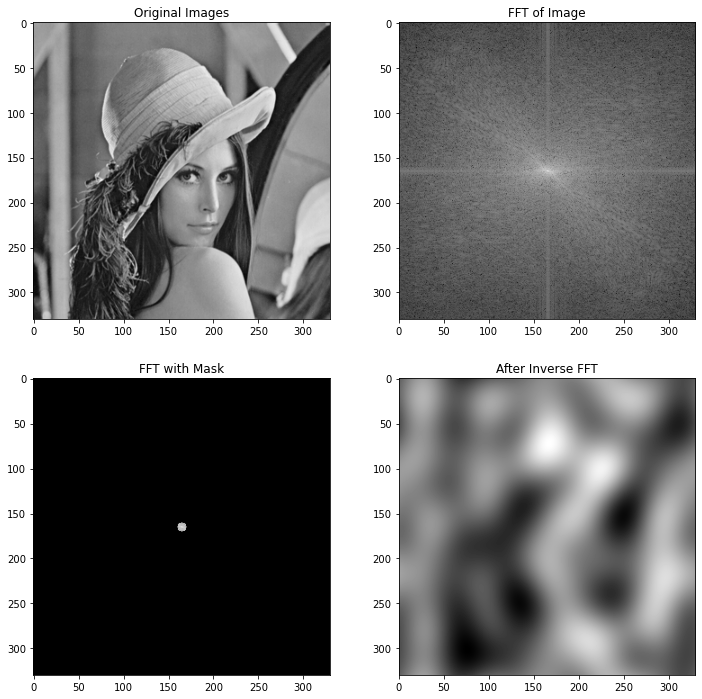

In [319]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imagesFFT_png3[0], cmap = 'gray')
ax1.title.set_text('Original Images')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imagesFFT_png3[1], cmap = 'gray')
ax2.title.set_text('FFT of Image')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(imagesFFT_png3[2], cmap='gray')
ax3.title.set_text('FFT with Mask')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(imagesFFT_png3[3], cmap = 'gray')
ax4.title.set_text('After Inverse FFT')
plt.show()

## Calculating Histogram PNG Image 

In [320]:
histogram_title_png = ['Original Image', 'Smoothing Filter 1', 'Smoothing Filter 2', 'smoothing Filter 3']
histogram_png = [img_png, img_back_png1, img_back_png2, img_back_png3]

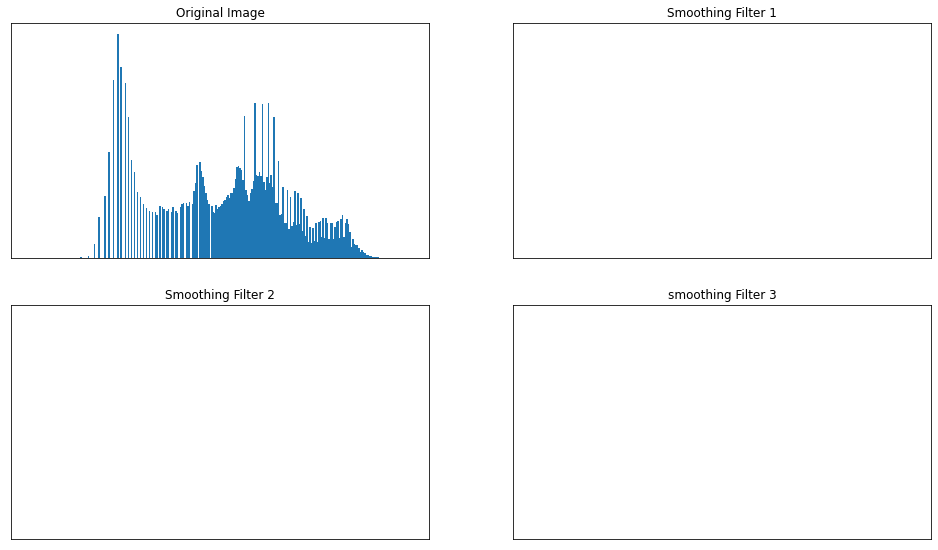

In [321]:

for i in range(4):
    plt.subplot(2, 2, i+1), plt.hist(histogram_png[i].ravel(), 256, [0, 256])
    plt.title(histogram_title_png[i])
    plt.xticks([]), plt.yticks([])

fig = plt.gcf()
fig.set_size_inches(16.5, 9.5)


# TIFF Filter Image Output (Frequency Domain - Smoothing)

#### Figure for Filter 1 

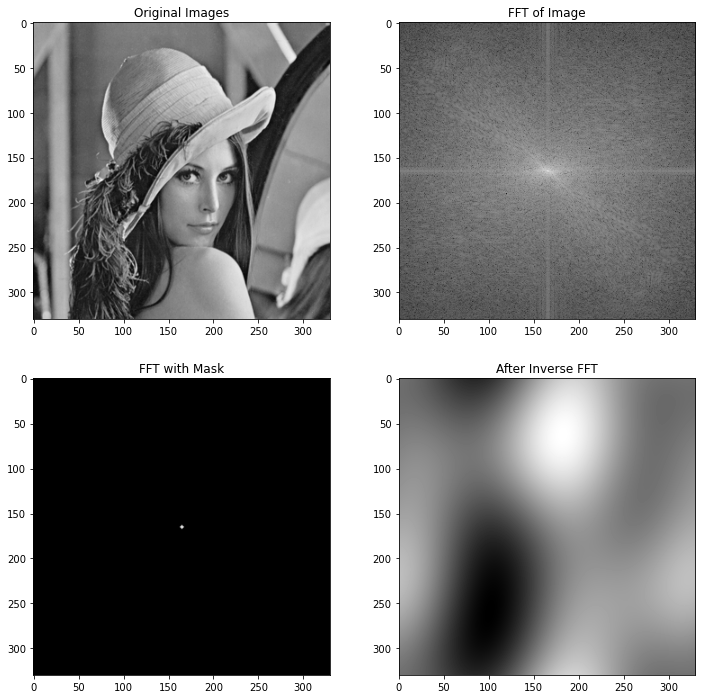

In [322]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imagesFFT_tiff1[0], cmap = 'gray')
ax1.title.set_text('Original Images')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imagesFFT_tiff1[1], cmap = 'gray')
ax2.title.set_text('FFT of Image')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(imagesFFT_tiff1[2], cmap='gray')
ax3.title.set_text('FFT with Mask')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(imagesFFT_tiff1[3], cmap = 'gray')
ax4.title.set_text('After Inverse FFT')
plt.show()

#### Figures for Filter 2  

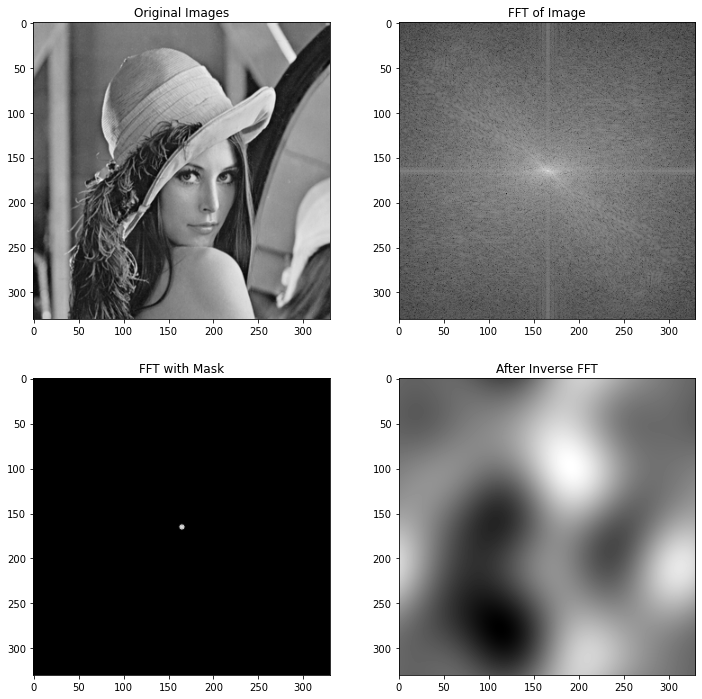

In [323]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imagesFFT_tiff2[0], cmap = 'gray')
ax1.title.set_text('Original Images')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imagesFFT_tiff2[1], cmap = 'gray')
ax2.title.set_text('FFT of Image')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(imagesFFT_tiff2[2], cmap='gray')
ax3.title.set_text('FFT with Mask')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(imagesFFT_tiff2[3], cmap = 'gray')
ax4.title.set_text('After Inverse FFT')
plt.show()

#### Figures for Filter 3 

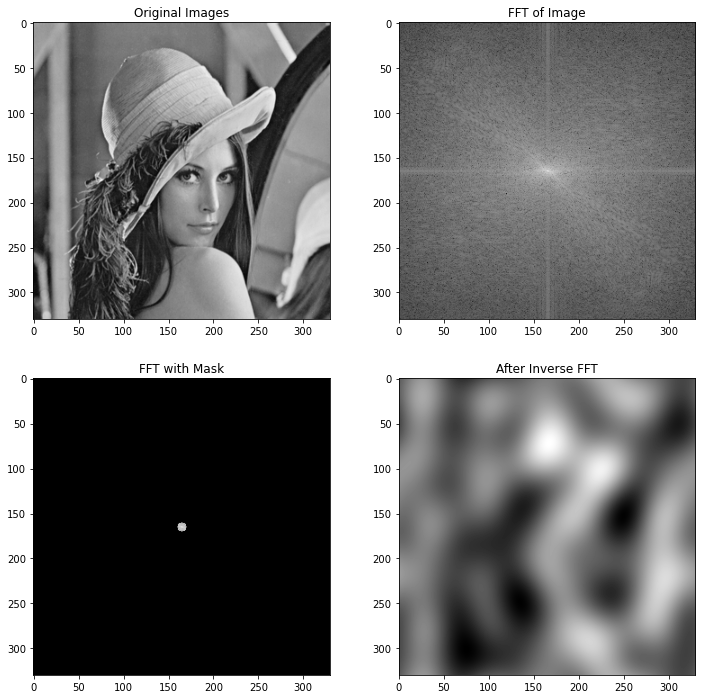

In [324]:
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imagesFFT_tiff3[0], cmap = 'gray')
ax1.title.set_text('Original Images')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imagesFFT_tiff3[1], cmap = 'gray')
ax2.title.set_text('FFT of Image')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(imagesFFT_tiff3[2], cmap='gray')
ax3.title.set_text('FFT with Mask')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(imagesFFT_tiff3[3], cmap = 'gray')
ax4.title.set_text('After Inverse FFT')
plt.show()

## Histogram for TIFF Images

In [325]:
histogram_title_tiff = ['Original Image', 'Smoothing Filter 1', 'Smoothing Filter 2', 'smoothing Filter 3']
histogram_tiff = [img_tiff, img_back_tiff1, img_back_tiff2, img_back_tiff3]

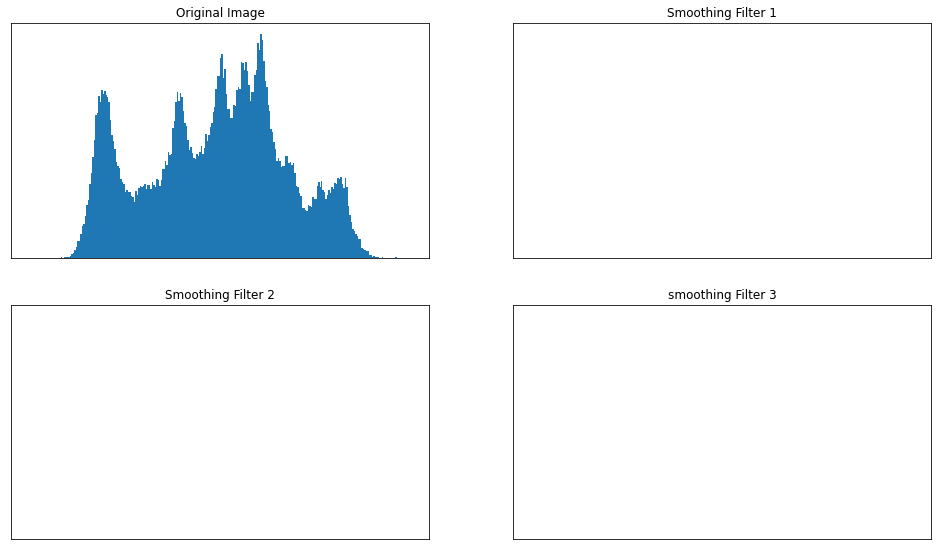

In [326]:
for i in range(4):
    plt.subplot(2, 2, i+1), plt.hist(histogram_tiff[i].ravel(), 256, [0, 256])
    plt.title(histogram_title_tiff[i])
    plt.xticks([]), plt.yticks([])

fig = plt.gcf()
fig.set_size_inches(16.5, 9.5)
